<a href="https://colab.research.google.com/github/thoongee/MachineLearning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=7700b81c7b0ce9c2cfeef50b570ba2d098dedad2da13ca33d11e3d8f28d8d7d9
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [13]:
#기본 import
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pandas
import mglearn
from sklearn.model_selection import train_test_split

# 데이터셋

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Gl

X.shape: (26, 2)


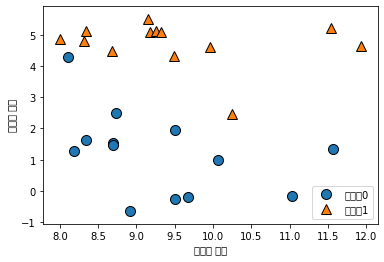

In [3]:
X,y = mglearn.datasets.make_forge()
#산점도
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스0","클래스1"],loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")
print('X.shape:',X.shape)

데이터2

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [22]:
print('cancer data format: ',cancer.data.shape) # 569개의 data point, 30개의 feature

cancer data format:  (569, 30)
30


In [7]:
print('클래스별 샘플개수: ',{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플개수:  {'malignant': 212, 'benign': 357}


In [10]:
print('특성 이름: ',cancer.feature_names)

특성 이름:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# DT

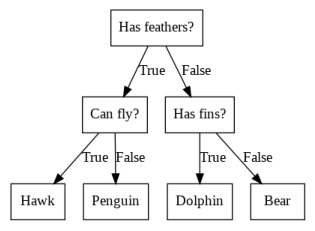

In [11]:
mglearn.plots.plot_animal_tree()
# 3 features : feather, fly, fin
# 4 class : Hawk, Penguin, Dolphin, Bear

In [ ]:
#scikit-learn : pre-pruning만 지원

In [14]:
from sklearn.tree import  DecisionTreeClassifier


cancer = load_breast_cancer()
#stratify: default=None, classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 
#random_state : Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.
random_state: 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print('train set accuracy: {:.3f}'.format(tree.score(X_train, y_train))) # 모든 leaf node = pure node일 경우 정확도 = 100%
print('test set accuracy: {:.3f}'.format(tree.score(X_test, y_test)))

train set accuracy: 1.000
test set accuracy: 0.937


In [15]:
# pre-pruning : 일정 깊이에 도달하면 트리의 성장 멈추기
# 트리 깊이를 제한(max_depth)하면 과대적합이 줄어듬
# 훈련 세트의 정확도 하락, 테스트 세트의 성능 개선

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('train set accuracy: {:.3f}'.format(tree.score(X_train, y_train)))
print('test set accuracy: {:.3f}'.format(tree.score(X_test, y_test)))

train set accuracy: 0.988
test set accuracy: 0.951


결정트리분석

In [16]:
from sklearn.tree import export_graphviz
#그래프 저장용 텍스트 파일 포맷인 .dot 생성
export_graphviz(tree, out_file='tree.dot', class_names=['negative','positive'], feature_names=cancer.feature_names, impurity=False, filled=True)

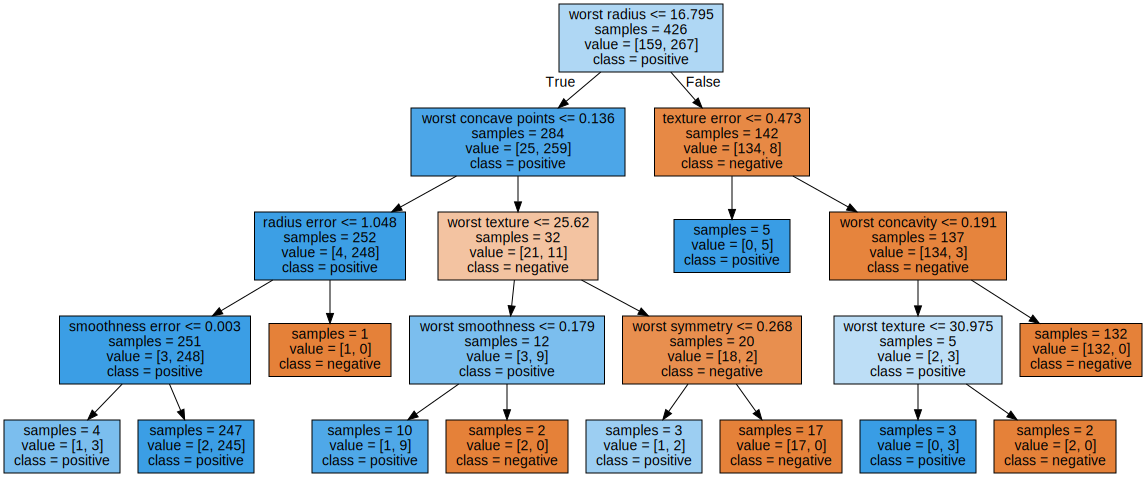

In [17]:
#생성한 파일 읽어서 시각화
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

# samples : 각 노드에 있는 샘플의 수
# value : 클래스 당 샘플의 수
# 

feature importance

In [19]:
# 전체 트리를 살펴보는 것이 어려울 수 있으니, 트리가 어떻게 작동하는지 요약하는 속성들을 사용할 수 있음
# feature importance : 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가 (0~1, 0:각 특성에 대해 전혀 사용되지 않음, 1: 완벽하게 target class예측)
print('feature importance:\n',tree.feature_importances_)

feature importance:
  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


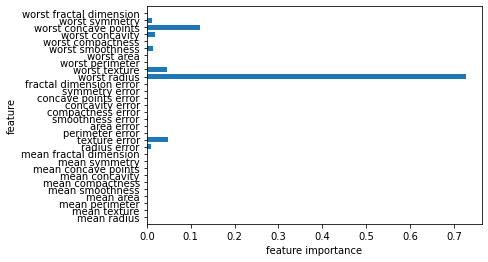

In [20]:
# 시각화
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel('feature importance')
  plt.ylabel('feature')
  plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)

특성과 클래스 사이의 관계

Feature importances: [0. 1.]


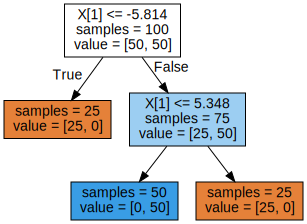

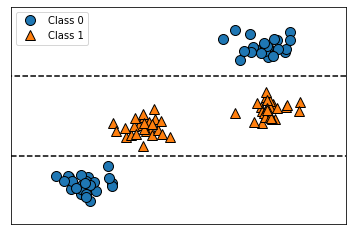

In [23]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree) 
# y축의 특성이 class label과 복합적인 관계를 가지고 있는 2차원 데이터셋과 결정트리가 만든 결정 경계
# x[1]값이 높으면 class 0 이고 낮으면 1이다 라고 말할 수 xx --> x[1]과 출력 클래스와의 관계는 단순히 비례/반비례 관계가 아님